# Exercise1 MINIST TRAINING OPTIMIZATION

* step1 加载必要的库函数

In [48]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Conv2D,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import Callback
from historycal_tf2 import LossHistory
from matplotlib import pyplot as plt
#

* step2 minist数据在keras中自带，可以通过网络加载

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 4s 0us/step
(60000, 28, 28)


(60000, 28, 28) (10000, 28, 28)


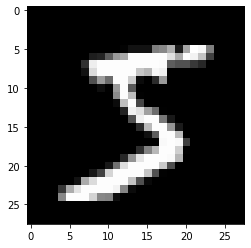

In [5]:
#confirm the data dimention
print(X_train.shape,X_test.shape) 
plt.imshow(X_train[0,:,:],cmap='gray')

* step3 标准化处理

In [6]:
# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(X_train.shape)

(60000, 784)


* step4 构建CNN网络

In [7]:
# model-sequential
model = Sequential([
    Dense(128, input_dim=784),
    Dense(64, input_dim=128),
    Activation('relu'),
    Dense(32, input_dim=64),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    Dropout(0.2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

* setp5 训练模型

In [70]:
# Another way to define your optimizer
# rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
loss=Adam()
# We add metrics to get more results you want to see
model.compile(optimizer=loss,loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
print('Training ------------')
# Another way to train the model
histories=LossHistory_tf2()
history =model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=True,batch_size=128,validation_data=(X_test,y_test),callbacks=histories)

Training ------------
Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2250 - accuracy: 0.7940 - val_loss: 0.1310 - val_accuracy: 0.9692
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2415 - accuracy: 0.7924 - val_loss: 0.1232 - val_accuracy: 0.9725
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2329 - accuracy: 0.7944 - val_loss: 0.1205 - val_accuracy: 0.9741
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2592 - accuracy: 0.7933 - val_loss: 0.1303 - val_accuracy: 0.9709
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2273 - accuracy: 0.7947 - val_loss: 0.1275 - val_accuracy: 0.9745
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2699 - accuracy: 0.7922 - val_loss: 0.1457 - val_accuracy: 0.9696
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 3.2211 - accuracy: 0.7954 - val_loss: 0.1242 - val_a

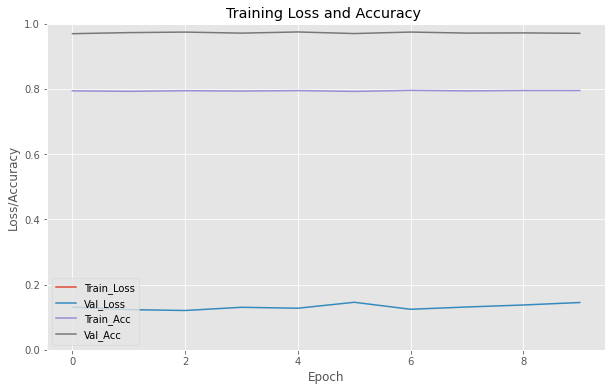

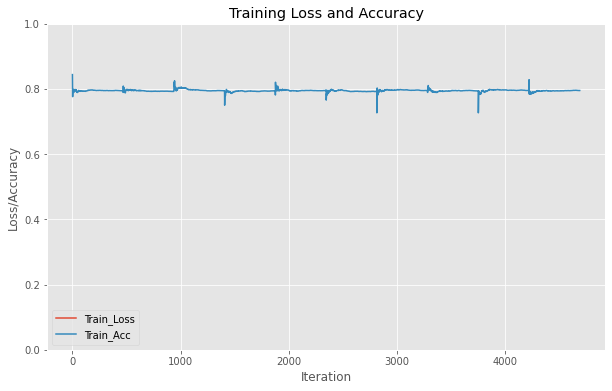

In [72]:
histories.loss_plot('epoch','./')
histories.loss_plot('batch','./')
histories.h5_save('./history.hdf5')

(100, 10)
[[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]] 7


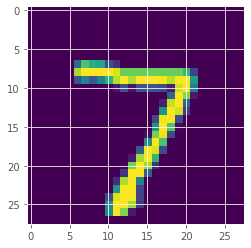

In [74]:
# test the model 
testdata=X_test[:100]
# get the probability value
pred=model.predict(testdata,batch_size=20)
# get the classification value
pred_c=np.argmax(pred,axis=1)
# pred_c=model.predict_classes(testdata,batch_size=20)
print(pred.shape)
reshapedata=testdata.reshape(100,28,28)
plt.imshow(reshapedata[0,:,:])
print(np.round(pred[:1]*100),pred_c[0])

* setp5保存模型

In [107]:
model.save('./mnist.h5')